# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [20]:
# Your code here.
import pandas as pd

student_data = pd.DataFrame({'X': [17,51,27,21,36,48,19,26,54,30], 'Y': [10,1,5,9,4,2,9,6,0,3]})
student_data


X   Y
0  17  10
1  51   1
2  27   5
3  21   9
4  36   4
5  48   2
6  19   9
7  26   6
8  54   0
9  30   3

Draw a dispersion diagram (scatter plot) for the data.

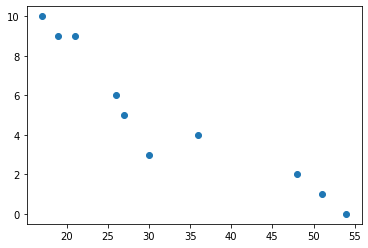

In [2]:
# Your code here.
import matplotlib.pyplot as plt

x = student_data[["X"]]
y = student_data["Y"]

plt.scatter(x,y)
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [3]:
# Your response here. 

#There appears to be a trend in which the age can be a predicting factor of the number of tardiness of the students.
#An hipothesis to be tested would be that the older the students get, the less late they get to class.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [23]:
# Your response here.

# Calculate covariance
cov = student_data['X'].cov(student_data['Y'])
print('Covariance:', cov)

# Calculate correlation
corr = student_data['X'].corr(student_data['Y'])
print('Correlation:', corr)

#Comments:
#Covariance measures the degree to which two variables vary together. If it's positive the 2 variables increase or decrease 
# together. If negative, they move in opposite directions. 

# Correlation measures the strength of a linear relationship between two variables. Correlation ranges from -1 to 1.
# In this example, a correlation of -0.93 indicates a strong negative linear relationship between X and Y.

Covariance: -45.56666666666667
Correlation: -0.9391626886887122


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [5]:
# Your response here.

from sklearn import linear_model

model = linear_model.LinearRegression()
result = model.fit(x,y)
result.score(x,y)

# I'm using x (age) as feature and y (tardiness) as target, for a linear regression

0.8820265558250109

Plot your regression model on your scatter plot.

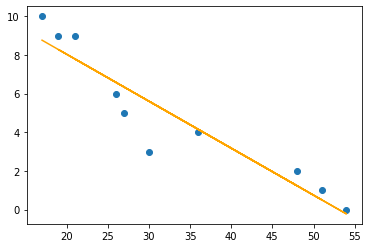

In [6]:
# Your code here.

regression_line = model.intercept_ + model.coef_[0] * x
plt.plot(x, regression_line, c="orange")
plt.scatter(x,y)
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [17]:
# Your response here. 

# Age seems to be a good predictor of tardiness. The score of the model (age vs tardiness) is very high, and the regression line 
# also seems to fit the data well.

result.score(x,y)

0.8820265558250109

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [8]:
# Import any libraries you may need & the data

import pandas as pd

data = pd.read_csv("C:/Users/migue/Documents/IRONHACK/Week 4/Labs/lab-regression-analysis/your-code/vehicles.csv")

data.head(3)


Make                Model  Year  Engine Displacement  Cylinders  \
0  AM General    DJ Po Vehicle 2WD  1984                  2.5        4.0   
1  AM General     FJ8c Post Office  1984                  4.2        6.0   
2  AM General  Post Office DJ5 2WD  1985                  2.5        4.0   

      Transmission        Drivetrain                Vehicle Class Fuel Type  \
0  Automatic 3-spd     2-Wheel Drive  Special Purpose Vehicle 2WD   Regular   
1  Automatic 3-spd     2-Wheel Drive  Special Purpose Vehicle 2WD   Regular   
2  Automatic 3-spd  Rear-Wheel Drive  Special Purpose Vehicle 2WD   Regular   

   Fuel Barrels/Year  City MPG  Highway MPG  Combined MPG  \
0          19.388824        18           17            17   
1          25.354615        13           13            13   
2          20.600625        16           17            16   

   CO2 Emission Grams/Mile  Fuel Cost/Year  
0               522.764706            1950  
1               683.615385            2550  
2               555.437500            2100

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [28]:
# Your response here. 
data = data[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year','CO2 Emission Grams/Mile']]

data.head(3)
data.corr()

# The variables that best predict CO2 Emission Grams/Mile are Fuel Barrels/Year, Fuel Cost/Year and Combined MPG. 
# The variable that provides the least amount of helpful info is Year.

Year  Cylinders  Fuel Barrels/Year  Combined MPG  \
Year                     1.000000   0.082469          -0.221084      0.204751   
Cylinders                0.082469   1.000000           0.739517     -0.698648   
Fuel Barrels/Year       -0.221084   0.739517           1.000000     -0.909743   
Combined MPG             0.204751  -0.698648          -0.909743      1.000000   
Fuel Cost/Year          -0.091913   0.778153           0.916208     -0.875185   
CO2 Emission Grams/Mile -0.222300   0.752393           0.986189     -0.926229   

                         Fuel Cost/Year  CO2 Emission Grams/Mile  
Year                          -0.091913                -0.222300  
Cylinders                      0.778153                 0.752393  
Fuel Barrels/Year              0.916208                 0.986189  
Combined MPG                  -0.875185                -0.926229  
Fuel Cost/Year                 1.000000                 0.930865  
CO2 Emission Grams/Mile        0.930865                 1.000000

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [32]:
# Your response here. 

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

y = data["CO2 Emission Grams/Mile"]
x = data[["Fuel Barrels/Year","Fuel Cost/Year", "Combined MPG"]]

model = LinearRegression()
result = model.fit(x,y)

regression_line = result.intercept_ + result.coef_[0] * x["Fuel Barrels/Year"] + result.coef_[1] * x["Fuel Cost/Year"] + result.coef_[2] * x["Combined MPG"]

#I'm using a linear regression as all variables are continuous.


0.9801993833262163

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [36]:
# Your response here. 

print(result.score(x,y))

from sklearn.metrics import mean_squared_error

pred = result.predict(x)
print(mean_squared_error(pred,y, squared = False))

#The model is quite robust. The score of the model is very close to 1, 
# and through the RMSE we can see that this model only misses 16.75 times.

0.9801993833262163
16.753363704215353


## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [48]:
# Your code here.

party = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,13]})
party

X   Y
0   1   1
1   3   2
2   4   4
3   6   4
4   8   5
5   9   7
6  11   8
7  14  13

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

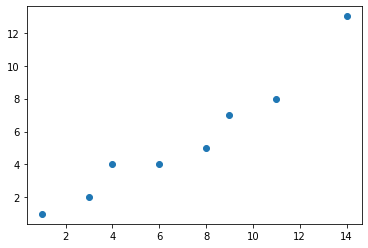

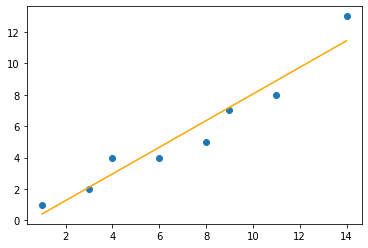

In [45]:
# Your code here.
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

x = party[["X"]]
y = party["Y"]

plt.scatter(x,y)
plt.show()

#################

model = linear_model.LinearRegression()
result = model.fit(x,y)
regression_line = result.intercept_ + result.coef_[0] * x
plt.plot(x, regression_line, c="orange")
plt.scatter(x,y)
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [46]:
# Your response here. 

print(result.score(x,y))

pred = result.predict(x)
print(mean_squared_error(pred,y, squared = False))

# Through this plot, and regression line we can guess that these variables have a strong correlation between one another,
# and that they both move in the same direction, meaning the more people invited, the more people attend the party -
# which contradicts the initial prediction.

0.9316696375519905
0.933387444318875


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

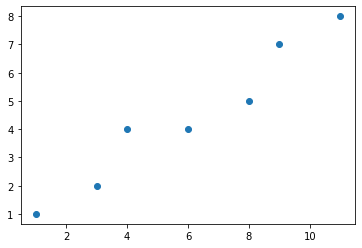

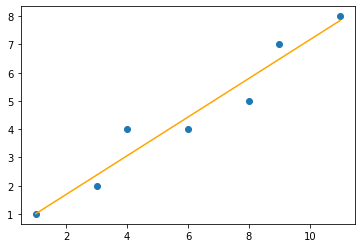

0.9433811802232854
0.5523118096904349


In [52]:
# Your response here. 

# The last value from "party" dataset might be an outlier. Removing it from the data:
party2 = party[:-1]
party2

x2 = party2[["X"]]
y2 = party2["Y"]

plt.scatter(x2,y2)
plt.show()

#################

model2 = linear_model.LinearRegression()
result2 = model.fit(x2,y2)
regression_line = result2.intercept_ + result2.coef_[0] * x2
plt.plot(x2, regression_line, c="orange")
plt.scatter(x2,y2)
plt.show()

#################

print(result2.score(x2,y2))

pred2 = result2.predict(x2)
print(mean_squared_error(pred2,y2, squared = False))

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [16]:
# Your response here. 

# The score of the model improved once the outlier was removed, and the error of the model (RMSE) also decreased. 
# Thus the model can predict better the number of people attanding the party, if the outliers are removed.
# With or without the outliers, we are also able to see that linear regression is the appropriate model to the relationship
#between these two variables.